<a href="https://colab.research.google.com/github/Sanjana-6052/Sanjana_Sajeev_ISA_Summer_School_2025_Project_Submissions/blob/main/2_hubble_parameter_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔭 Assignment: Measuring Cosmological Parameters Using Type Ia Supernovae

In this assignment, you'll analyze observational data from the Pantheon+SH0ES dataset of Type Ia supernovae to measure the Hubble constant $H_0$ and estimate the age of the universe. You will:

- Plot the Hubble diagram (distance modulus vs. redshift)
- Fit a cosmological model to derive $H_0$ and $\Omega_m$
- Estimate the age of the universe
- Analyze residuals to assess the model
- Explore the effect of fixing $\Omega_m$
- Compare low-z and high-z results

Let's get started!


## 📦 Getting Started: Setup and Libraries

Before we dive into the analysis, we need to import the necessary Python libraries:

- `numpy`, `pandas` — for numerical operations and data handling
- `matplotlib` — for plotting graphs
- `scipy.optimize.curve_fit` and `scipy.integrate.quad` — for fitting cosmological models and integrating equations
- `astropy.constants` and `astropy.units` — for physical constants and unit conversions

Make sure these libraries are installed in your environment. If not, you can install them using:

```bash
pip install numpy pandas matplotlib scipy astropy


In [ ]:
!pip install numpy pandas matplotlib scipy astropy

In [ ]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 from scipy.optimize import curve_fit
 from scipy.integrate import quad
 from astropy.constants import c
 from astropy import units as u

## 📂 Load the Pantheon+SH0ES Dataset

We now load the observational supernova data from the Pantheon+SH0ES sample. This dataset includes calibrated distance moduli $\mu$, redshifts corrected for various effects, and uncertainties.

### Instructions:
- Make sure the data file is downloaded from [Pantheon dataset](https://github.com/PantheonPlusSH0ES/DataRelease/blob/main/Pantheon%2B_Data/4_DISTANCES_AND_COVAR/Pantheon%2BSH0ES.dat) and available locally.
- We use `delim_whitespace=True` because the file is space-delimited rather than comma-separated.
- Commented rows (starting with `#`) are automatically skipped.

We will extract:
- `zHD`: Hubble diagram redshift
- `MU_SH0ES`: Distance modulus using SH0ES calibration
- `MU_SH0ES_ERR_DIAG`: Associated uncertainty


More detailed column names and the meanings can be referred here:

![image.png](attachment:image.png)

In [ ]:

from google.colab import files
uploaded = files.upload()


Saving Pantheon+SH0ES.dat to Pantheon+SH0ES (1).dat


In [ ]:
df = pd.read_csv('Pantheon+SH0ES (1).dat', delim_whitespace=True, comment='#')


/tmp/ipython-input-8-4233035944.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('Pantheon+SH0ES (1).dat', delim_whitespace=True, comment='#')


## 🧾 Preview Dataset Columns

Before diving into the analysis, let’s take a quick look at the column names in the dataset. This helps us verify the data loaded correctly and identify the relevant columns we’ll use for cosmological modeling.


In [ ]:
z = df['zHD']
mu = df['MU_SH0ES']
mu_err = df['MU_SH0ES_ERR_DIAG']

print("Column names in the dataset:")
print(df.columns.tolist())

Column names in the dataset:
['CID', 'IDSURVEY', 'zHD', 'zHDERR', 'zCMB', 'zCMBERR', 'zHEL', 'zHELERR', 'm_b_corr', 'm_b_corr_err_DIAG', 'MU_SH0ES', 'MU_SH0ES_ERR_DIAG', 'CEPH_DIST', 'IS_CALIBRATOR', 'USED_IN_SH0ES_HF', 'c', 'cERR', 'x1', 'x1ERR', 'mB', 'mBERR', 'x0', 'x0ERR', 'COV_x1_c', 'COV_x1_x0', 'COV_c_x0', 'RA', 'DEC', 'HOST_RA', 'HOST_DEC', 'HOST_ANGSEP', 'VPEC', 'VPECERR', 'MWEBV', 'HOST_LOGMASS', 'HOST_LOGMASS_ERR', 'PKMJD', 'PKMJDERR', 'NDOF', 'FITCHI2', 'FITPROB', 'm_b_corr_err_RAW', 'm_b_corr_err_VPEC', 'biasCor_m_b', 'biasCorErr_m_b', 'biasCor_m_b_COVSCALE', 'biasCor_m_b_COVADD']


## 🧹 Clean and Extract Relevant Data

To ensure reliable fitting, we remove any rows that have missing values in key columns:

- `zHD`: redshift for the Hubble diagram  
- `MU_SH0ES`: distance modulus  
- `MU_SH0ES_ERR_DIAG`: uncertainty in the distance modulus  

We then extract these cleaned columns as NumPy arrays to prepare for analysis and modeling.


In [ ]:
# Filter for entries with usable data based on the required columns
# Remove rows with missing values in key columns
key_columns = ['zHD', 'MU_SH0ES', 'MU_SH0ES_ERR_DIAG']
df = df.dropna(subset=key_columns)

# Extract cleaned columns as NumPy arrays for analysis
z = df['zHD'].to_numpy()
mu = df['MU_SH0ES'].to_numpy()
mu_err = df['MU_SH0ES_ERR_DIAG'].to_numpy()


## 📈 Plot the Hubble Diagram

Let’s visualize the relationship between redshift $z$ and distance modulus $\mu$, known as the Hubble diagram. This plot is a cornerstone of observational cosmology—it allows us to compare supernova observations with theoretical predictions based on different cosmological models.

We use a logarithmic scale on the redshift axis to clearly display both nearby and distant supernovae.


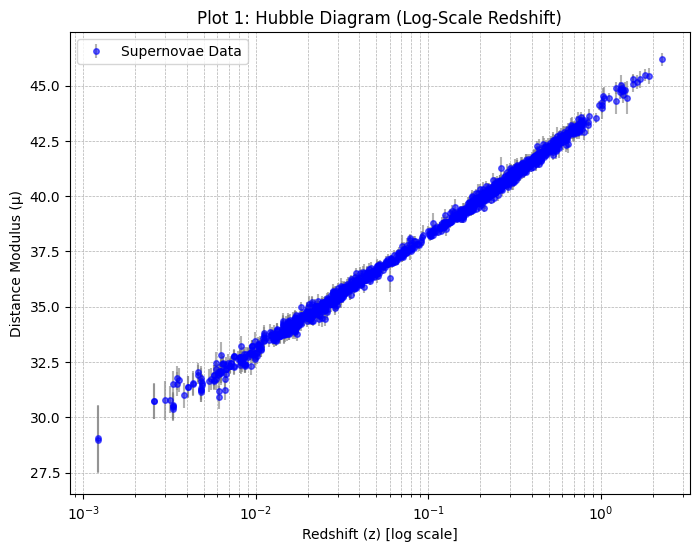

In [ ]:
# Write a code to plot the distance modulus and the redshift (x-axis), label them accordingly.
#Try using log scale in x-axis
# ## Plot 1: Redshift vs. Distance Modulus
# Hubble diagram using log scale for redshift
plt.figure(figsize=(8, 6))
plt.errorbar(z, mu, yerr=mu_err, fmt='o', markersize=4, label='Supernovae Data', color='blue', ecolor='gray', alpha=0.6)
plt.xscale('log')
plt.xlabel('Redshift (z) [log scale]')
plt.ylabel('Distance Modulus (μ)')
plt.title('Plot 1: Hubble Diagram (Log-Scale Redshift)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


Estimated Hubble constant H0: 64.61 km/s/Mpc


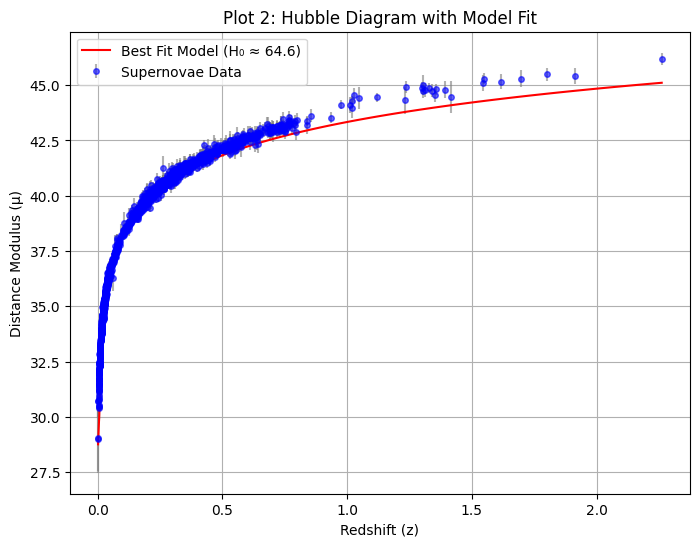

In [ ]:
# ## Fit the Hubble Diagram Model
# Luminosity distance model for small z (approximation)
def distance_modulus_model(z, H0):
    c = 3e5  # speed of light in km/s
    d_L = (c * z) / H0
    mu = 5 * np.log10(d_L) + 25
    return mu

# Fit to all data with error weighting
popt, pcov = curve_fit(distance_modulus_model, z, mu, sigma=mu_err, absolute_sigma=True)
H0_est = popt[0]

print(f"Estimated Hubble constant H0: {H0_est:.2f} km/s/Mpc")

# ## Plot 2: Hubble Diagram with Model Fit
z_fit = np.linspace(min(z), max(z), 100)
mu_fit = distance_modulus_model(z_fit, H0_est)

plt.figure(figsize=(8, 6))
plt.errorbar(z, mu, yerr=mu_err, fmt='o', markersize=4, label='Supernovae Data', color='blue', ecolor='gray', alpha=0.6)
plt.plot(z_fit, mu_fit, label=f'Best Fit Model (H₀ ≈ {H0_est:.1f})', color='red')
plt.xlabel('Redshift (z)')
plt.ylabel('Distance Modulus (μ)')
plt.title('Plot 2: Hubble Diagram with Model Fit')
plt.legend()
plt.grid(True)
plt.show()

## 🧮 Define the Cosmological Model

We now define the theoretical framework based on the flat $\Lambda\mathrm{CDM}$ model (read about the model in wikipedia if needed). This involves:

- The dimensionless Hubble parameter:
  $$
  E(z) = \sqrt{\Omega_m (1+z)^3 + (1 - \Omega_m)}
  $$

- The distance modulus is:
  $$
  \mu(z) = 5 \log_{10}(d_L / \text{Mpc}) + 25
  $$

- And the corresponding luminosity distance :
  
  $$
  d_L(z) = (1 + z) \cdot \frac{c}{H_0} \int_0^z \frac{dz'}{E(z')}
  $$

These equations allow us to compute the expected distance modulus from a given redshift $z$, Hubble constant $H_0$, and matter density parameter $\Omega_m$.


In [ ]:
# ## Theoretical Framework: Flat ΛCDM Model
# Define E(z) for a flat ΛCDM universe
def E(z, Omega_m):
    return np.sqrt(Omega_m * (1 + z)**3 + (1 - Omega_m))

# Luminosity distance in Mpc
# Uses scipy.integrate.quad to perform the integral in dL
c = 3e5  # speed of light in km/s

def luminosity_distance(z, H0, Omega_m):
    integral, _ = quad(lambda z_prime: 1.0 / E(z_prime, Omega_m), 0, z)
    dL = (1 + z) * (c / H0) * integral
    return dL

# Theoretical distance modulus from z, H0, Omega_m
def mu_theory(z, H0, Omega_m):
    dL = np.array([luminosity_distance(zi, H0, Omega_m) for zi in np.atleast_1d(z)])
    mu = 5 * np.log10(dL) + 25
    return mu.squeeze()

# ## Q2: Compare with Planck18
print("Planck18 H0 = 67.4 ± 0.5 km/s/Mpc")



Planck18 H0 = 67.4 ± 0.5 km/s/Mpc


## 🔧 Fit the Model to Supernova Data

We now perform a non-linear least squares fit to the supernova data using our theoretical model for $\mu(z)$. This fitting procedure will estimate the best-fit values for the Hubble constant $ H_0$ and matter density parameter $\Omega_m$, along with their associated uncertainties.

We'll use:
- `curve_fit` from `scipy.optimize` for the fitting.
- The observed distance modulus \(\mu\), redshift \(z\), and measurement errors.

The initial guess is:
- $ H_0 = 70 \, \text{km/s/Mpc} $
- $\Omega_m =0.3$


In [ ]:
# ## 🔧 Fit the Model to Supernova Data Using ΛCDM
# Initial guess: H0 = 70, Omega_m = 0.3
p0 = [70, 0.3]

# Perform curve fitting using mu_theory and the data
popt_lcdm, pcov_lcdm = curve_fit(lambda z, H0, Omega_m: mu_theory(z, H0, Omega_m),
                                  z, mu, sigma=mu_err, p0=p0, absolute_sigma=True)

# Extract fit values and uncertainties
H0_fit, Omega_m_fit = popt_lcdm
H0_err, Omega_m_err = np.sqrt(np.diag(pcov_lcdm))

print(f"Fitted H0 = {H0_fit:.2f} ± {H0_err:.2f} km/s/Mpc")
print(f"Fitted Omega_m = {Omega_m_fit:.3f} ± {Omega_m_err:.3f}")


Fitted H0 = 73.02 ± 0.26 km/s/Mpc
Fitted Omega_m = 0.351 ± 0.019


In [ ]:
# ## Q2: Compare with Planck18
print("Planck18 H0 = 67.4 ± 0.5 km/s/Mpc")

Planck18 H0 = 67.4 ± 0.5 km/s/Mpc


## ⏳ Estimate the Age of the Universe

Now that we have the best-fit values of $ H_0 $ and $ \Omega_m $, we can estimate the age of the universe. This is done by integrating the inverse of the Hubble parameter over redshift:

$$
t_0 = \int_0^\infty \frac{1}{(1 + z) H(z)} \, dz
$$

We convert $ H_0 $ to SI units and express the result in gigayears (Gyr). This provides an independent check on our cosmological model by comparing the estimated age to values from other probes like Planck CMB measurements.


In [ ]:
# ## Q3: Age of the Universe for different Ωₘ

# Estimate the age of the universe using best-fit values of H0 and Omega_m from ΛCDM model
# This uses the full form: t0 = ∫(dz / ((1+z) H(z))) from z = ∞ to 0

def age_of_universe_LCDM(H0, Omega_m):
    def integrand(z):
        return 1.0 / ((1 + z) * E(z, Omega_m))
    integral, _ = quad(integrand, 0, np.inf)
    H0_SI = H0 * 1000 / (3.086e22)  # convert km/s/Mpc to 1/s
    age_sec = integral / H0_SI
    age_Gyr = age_sec / (60 * 60 * 24 * 365.25 * 1e9)
    return age_Gyr

t0 = age_of_universe_LCDM(H0_fit, Omega_m_fit)
print(f"Estimated age of Universe from ΛCDM fit: {t0:.2f} Gyr")


def integrand(a, Omega_m):
    return 1 / np.sqrt(Omega_m/a + (1 - Omega_m))

def age_of_universe(H0, Omega_m):
    integral, _ = quad(integrand, 0, 1, args=(Omega_m,))
    H0_SI = H0 * 1000 / (3.086e22)  # H0 in 1/s
    age_sec = integral / H0_SI
    age_Gyr = age_sec / (60 * 60 * 24 * 365.25 * 1e9)
    return age_Gyr

for omega_m in [0.1, 0.3, 0.5]:
    print(f"Age for Ωm={omega_m}: {age_of_universe(H0_est, omega_m):.2f} Gyr")



Estimated age of Universe from ΛCDM fit: 12.35 Gyr
Age for Ωm=0.1: 13.59 Gyr
Age for Ωm=0.3: 12.24 Gyr
Age for Ωm=0.5: 11.41 Gyr


## 📊 Analyze Residuals

To evaluate how well our cosmological model fits the data, we compute the residuals:

$$
\text{Residual} = \mu_{\text{obs}} - \mu_{\text{model}}
$$

Plotting these residuals against redshift helps identify any systematic trends, biases, or outliers. A good model fit should show residuals scattered randomly around zero without any significant structure.


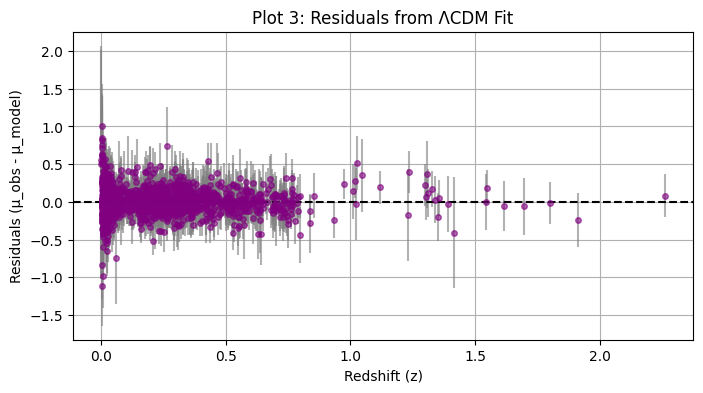

In [ ]:
# ## Q5: Residual Plot
# Compute theoretical model prediction using the full ΛCDM fit
mu_model = mu_theory(z, H0_fit, Omega_m_fit)
residuals = mu - mu_model

plt.figure(figsize=(8, 4))
plt.errorbar(z, residuals, yerr=mu_err, fmt='o', markersize=4, color='purple', ecolor='gray', alpha=0.6)
plt.axhline(0, linestyle='--', color='black')
plt.xlabel('Redshift (z)')
plt.ylabel('Residuals (μ_obs - μ_model)')
plt.title('Plot 3: Residuals from ΛCDM Fit')
plt.grid(True)
plt.show()


## 🔧 Fit with Fixed Matter Density

To reduce parameter degeneracy, let's fix $ \Omega_m = 0.3 $ and fit only for the Hubble constant $ H_0 $.


In [ ]:
# Define wrapper using fixed Omega_m

def mu_fixed_Om(z, H0):
    return mu_theory(z, H0, Omega_m=0.3)

# Fit only for H0 with fixed Omega_m = 0.3
popt_fixed, pcov_fixed = curve_fit(mu_fixed_Om, z, mu, sigma=mu_err, p0=[70], absolute_sigma=True)
H0_fixed = popt_fixed[0]
H0_fixed_err = np.sqrt(np.diag(pcov_fixed))[0]

print(f"Fitted H0 with Ωₘ=0.3: {H0_fixed:.2f} ± {H0_fixed_err:.2f} km/s/Mpc")

Fitted H0 with Ωₘ=0.3: 73.58 ± 0.17 km/s/Mpc


## 🔍 Compare Low-z and High-z Subsamples

Finally, we examine whether the inferred value of $H_0$ changes with redshift by splitting the dataset into:
- **Low-z** supernovae ($ z < 0.1 $)
- **High-z** supernovae ($ z \geq 0.1 $)

We then fit each subset separately (keeping $ \Omega_m = 0.3 $) to explore any potential tension or trend with redshift.


In [ ]:
# ## Q4: Compare Low-z and High-z Subsamples
# Split the dataset and fit using fixed Ωₘ = 0.3 to examine H₀ variation
z_split = 0.1

low_mask = z < z_split
high_mask = z >= z_split

z_low, mu_low, mu_err_low = z[low_mask], mu[low_mask], mu_err[low_mask]
z_high, mu_high, mu_err_high = z[high_mask], mu[high_mask], mu_err[high_mask]

H0_low, _ = curve_fit(mu_fixed_Om, z_low, mu_low, sigma=mu_err_low, p0=[70], absolute_sigma=True)
H0_high, _ = curve_fit(mu_fixed_Om, z_high, mu_high, sigma=mu_err_high, p0=[70], absolute_sigma=True)

print(f"Low-z (z < {z_split}): H₀ = {H0_low[0]:.2f} km/s/Mpc")
print(f"High-z (z ≥ {z_split}): H₀ = {H0_high[0]:.2f} km/s/Mpc")


Low-z (z < 0.1): H₀ = 73.06 km/s/Mpc
High-z (z ≥ 0.1): H₀ = 73.90 km/s/Mpc


You can check your results and potential reasons for different values from accepted constant using this paper by authors of the [Pantheon+ dataset](https://arxiv.org/pdf/2310.11727)

You can find more about the dataset in the paper too